<a href="https://colab.research.google.com/github/rodrigo12portugal/fiap-fase5-farmtech/blob/main/rm564773_pblfase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =========================================================
# 0. Configurações iniciais
# =========================================================
Instalando dependencias, carregando arquivo

In [3]:

# AJUSTE AQUI: Baixando bibliotecas
!pip -q install scikit-learn pandas numpy matplotlib seaborn joblib

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Para visualizar tudo
pd.set_option("display.max_columns", None)

# =========================================================
# 1. Carregar dados
# =========================================================
csv_path = "crop_yield.csv"
df = pd.read_csv(csv_path)
print("Colunas originais:", df.columns.tolist())
df.head()


Colunas originais: ['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# =========================================================
# 2. Padronizar nomes de colunas (robusto a acentos/variações)
# =========================================================


In [5]:
def achar_col(palavras):
    for col in df.columns:
        low = col.lower()
        if all(p in low for p in palavras):
            return col
    raise ValueError(f"Não achei coluna com padrões: {palavras}")

df = df.rename(columns={
    "Crop": "cultura",
    "Precipitation (mm day-1)": "precipitacao_mm_dia",
    "Specific Humidity at 2 Meters (g/kg)": "umidade_especifica_gkg",
    "Relative Humidity at 2 Meters (%)": "umidade_relativa_pct",
    "Temperature at 2 Meters (C)": "temperatura_c",
    "Yield": "rendimento_t_ha"
})

df.head()


,cultura,precipitacao_mm_dia,umidade_especifica_gkg,umidade_relativa_pct,temperatura_c,rendimento_t_ha
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# =========================================================
# 3. Anlise exploratoria
# =========================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cultura                 156 non-null    object 
 1   precipitacao_mm_dia     156 non-null    float64
 2   umidade_especifica_gkg  156 non-null    float64
 3   umidade_relativa_pct    156 non-null    float64
 4   temperatura_c           156 non-null    float64
 5   rendimento_t_ha         156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB
None


,cultura,precipitacao_mm_dia,umidade_especifica_gkg,umidade_relativa_pct,temperatura_c,rendimento_t_ha
count,156,156.000000,156.000000,156.000000,156.00000,156.000000
unique,4,NaN,NaN,NaN,NaN,NaN
top,"Cocoa, beans",NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN
mean,NaN,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,NaN,289.457914,0.293923,0.996226,0.26105,70421.958897
min,NaN,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,NaN,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,NaN,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,NaN,2718.080000,18.400000,85.510000,26.30000,67518.750000


Nulos por coluna:
 cultura                   0
precipitacao_mm_dia       0
umidade_especifica_gkg    0
umidade_relativa_pct      0
temperatura_c             0
rendimento_t_ha           0
dtype: int64
Duplicados: 0


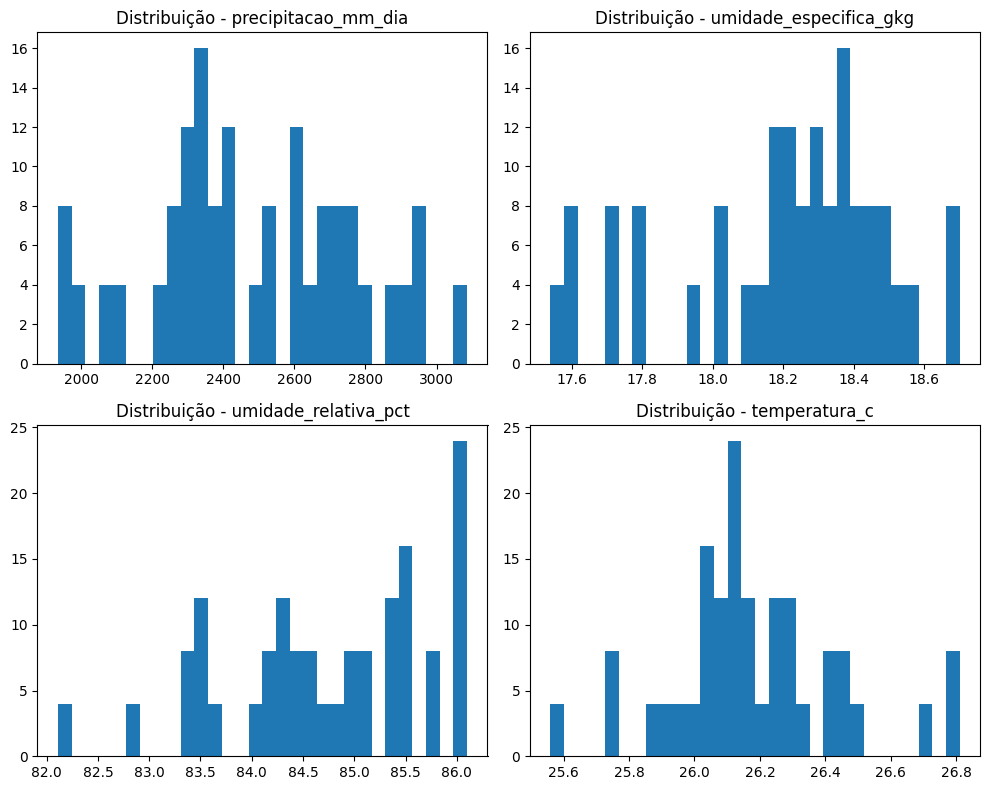

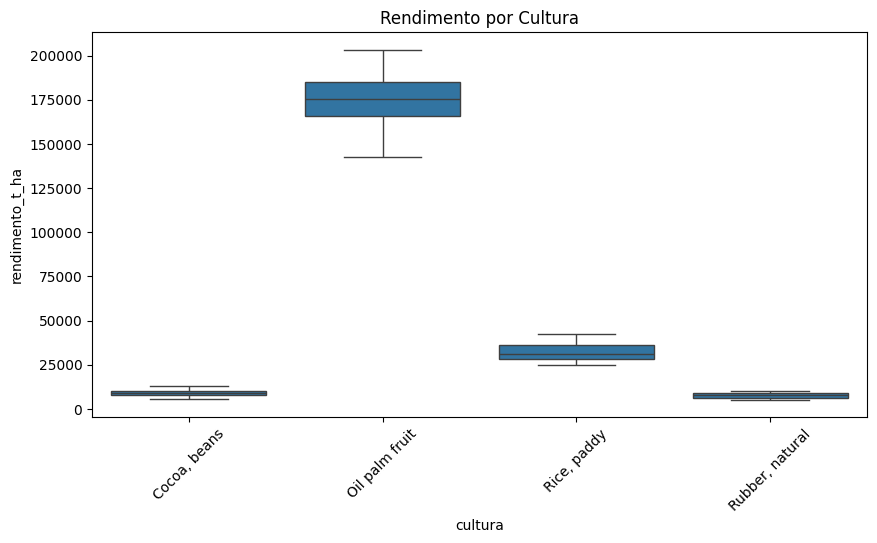

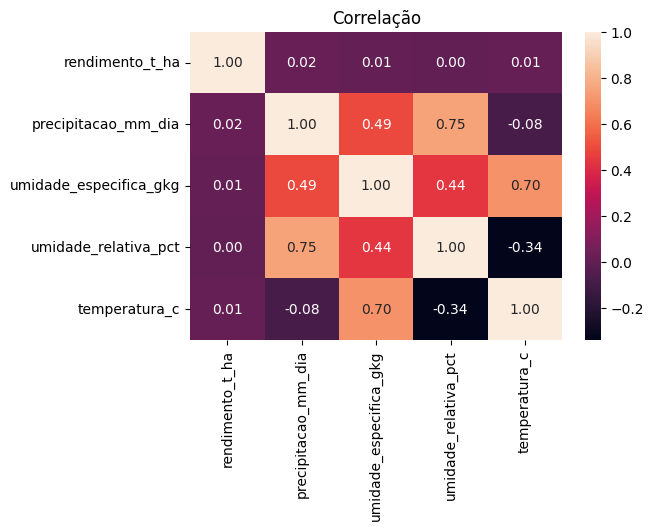

In [7]:
print(df.info())
display(df.describe(include="all"))

# valores ausentes e duplicados
print("Nulos por coluna:\n", df.isna().sum())
print("Duplicados:", df.duplicated().sum())

# Distribuições
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs = axs.ravel()
num_cols = ["precipitacao_mm_dia","umidade_especifica_gkg","umidade_relativa_pct","temperatura_c"]
for i, c in enumerate(num_cols):
    axs[i].hist(df[c].dropna(), bins=30)
    axs[i].set_title(f"Distribuição - {c}")
plt.tight_layout(); plt.show()

# Boxplot do rendimento por cultura
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="cultura", y="rendimento_t_ha")
plt.xticks(rotation=45)
plt.title("Rendimento por Cultura")
plt.show()

# Correlação entre variáveis numéricas
plt.figure(figsize=(6,4))
sns.heatmap(df[["rendimento_t_ha"]+num_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlação")
plt.show()


# =========================================================
# 4. Outliers e tendências (Clustering)
# =========================================================

Silhouette por k: {2: np.float64(0.28859625056829546), 3: np.float64(0.2985453414191091), 4: np.float64(0.36280526338559393), 5: np.float64(0.3587289736016501), 6: np.float64(0.3671728119264063), 7: np.float64(0.37448970907157897), 8: np.float64(0.3907480338380863)}
k escolhido (maior silhouette): 8


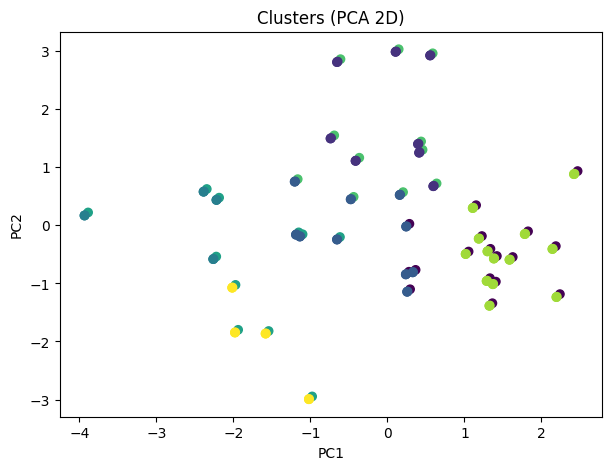

Outliers detectados: 63


In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest

X_cluster = df[["precipitacao_mm_dia","umidade_especifica_gkg","umidade_relativa_pct","temperatura_c","rendimento_t_ha"]].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Escolher k (2 a 8) pelo silhouette
scores = {}
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

print("Silhouette por k:", scores)
k_melhor = max(scores, key=scores.get)
print("k escolhido (maior silhouette):", k_melhor)

kmeans = KMeans(n_clusters=k_melhor, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_scaled)
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Outliers com Isolation Forest
iso = IsolationForest(random_state=42, contamination="auto")
out_pred = iso.fit_predict(X_scaled)  # -1 = outlier
print("Outliers detectados:", (out_pred==-1).sum())


# =========================================================
# 5. Modelagem preditiva (5 modelos)
# =========================================================

In [10]:

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np

features = ["cultura","precipitacao_mm_dia","umidade_especifica_gkg","umidade_relativa_pct","temperatura_c"]
target = "rendimento_t_ha"

X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X["cultura"] if X["cultura"].nunique()>1 else None
)

numeric_features = ["precipitacao_mm_dia","umidade_especifica_gkg","umidade_relativa_pct","temperatura_c"]
categorical_features = ["cultura"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), numeric_features),
        ("cat", Pipeline(steps=[
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features)
    ],
    remainder="drop"
)

modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.001, random_state=42, max_iter=10000),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

resultados = []

for nome, modelo in modelos.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("reg", modelo)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    cv = cross_validate(pipe, X, y, cv=5,
                        scoring=("neg_mean_absolute_error","neg_root_mean_squared_error","r2"),
                        n_jobs=-1,
                        return_train_score=False)
    res = {
        "modelo": nome,
        "MAE_test": mae,
        "RMSE_test": rmse,
        "R2_test": r2,
        "MAE_cv_mean": -cv["test_neg_mean_absolute_error"].mean(),
        "RMSE_cv_mean": -cv["test_neg_root_mean_squared_error"].mean(),
        "R2_cv_mean": cv["test_r2"].mean()
    }
    resultados.append(res)

pd.DataFrame(resultados).sort_values("RMSE_test")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.211e+09, tolerance: 6.228e+07
  model = cd_fast.enet_coordinate_descent(


,modelo,MAE_test,RMSE_test,R2_test,MAE_cv_mean,RMSE_cv_mean,R2_cv_mean
1,Ridge,4953.271715,8109.232769,0.985573,9420.318047,10970.243342,-11.298635
0,LinearRegression,4988.892022,8543.629365,0.983985,8541.111522,10273.966690,-2.354374
2,Lasso,4989.090991,8543.698083,0.983985,8540.303228,10273.096477,-2.351622
4,GradientBoosting,5130.739217,9555.561255,0.979967,8127.633095,10428.249066,-0.969343
3,RandomForest,4608.952604,9606.348129,0.979754,7793.835519,9913.159832,0.099063


# =========================================================
# 6. salvando o melhor modelo
# =========================================================

In [13]:
df_res = pd.DataFrame(resultados).sort_values(["RMSE_test","MAE_test"])
melhor_nome = df_res.iloc[0]["modelo"]
print("Melhor modelo:", melhor_nome)
melhor_modelo = Pipeline(steps=[("prep", preprocess), ("reg", modelos[melhor_nome])])
melhor_modelo.fit(X, y)

joblib.dump(melhor_modelo, "model.joblib")
print("Salvo como model.joblib")


Melhor modelo: Ridge
Salvo como model.joblib


# =========================================================
# 7. Importância de variáveis (permutações)
# =========================================================

In [14]:
from sklearn.inspection import permutation_importance

r = permutation_importance(melhor_modelo, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)
# Os nomes das colunas após o preprocess mudam; para interpretação simples,
# vamos só mostrar a importância relativa (índice):
importancias = pd.Series(r.importances_mean).sort_values(ascending=False)
importancias.head(10)


,0
0,1.885400
1,0.002442
3,0.001819
4,0.000055
2,-0.000586
